#Performance analysis
Plot ROC curves and per-epoch performance analysis for trained models

In [1]:
import dataset, models
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
import pickle

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 25 days


In [2]:
input_dim = len(dataset.AAs) + 1

#
# Model Specific Settings - need to change these based on the model
#
NUMEXS = 200000
DATA_NAME = 'GRU512_200K'
MODEL_NAME = 'GRU-200K'
model = models.getModel('GRU512', input_dim)
background = 'global'


# path to save figures
fig_base_path = '/home/gene245/cprobert/deep-psp/keras/figures/' + DATA_NAME


In [3]:
# load training/test data
X_train, X_test, y_train, y_test = dataset.getSplitDataset(
    'transmembrane-region', num_exs=NUMEXS, bkgrd=background, 
    max_len=100, min_len=10, test_size=0.1)

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad')

/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/sandbox/rng_mrg.py:768: UserWarning: MRG_RandomStreams Can't determine #streams from size (Shape.0), guessing 60*256
  nstreams = self.n_streams(size)
/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/tensor/subtensor.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  start in [None, 0] or
/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/tensor/subtensor.py:114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  stop in [None, length, maxsize] or
/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:85: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [5]:
weights_path = '/home/gene245/cprobert/deep-psp/keras/output/' + DATA_NAME + '_model_weights.hdf5'
model.load_weights(weights_path)

In [6]:
test_preds = model.predict(X_test)
train_preds = model.predict(X_train)

180000/180000 [==============================] - 389s   


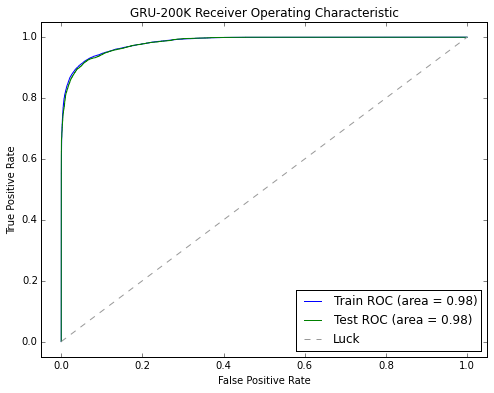

In [7]:
plt.figure(figsize=(8, 6), dpi=500)

# Plot the train ROC curve
train_labels_1 = y_train[:,1]
train_preds_1 = train_preds[:,1]
fpr, tpr, thresholds = roc_curve(train_labels_1, train_preds_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Train ROC (area = %0.2f)' % (roc_auc))

# Plot the test ROC curve
test_labels_1 = y_test[:,1]
test_preds_1 = test_preds[:,1]
fpr, tpr, thresholds = roc_curve(test_labels_1, test_preds_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Test ROC (area = %0.2f)' % (roc_auc))

# Plot the 'luck' line
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

# Set axis dimensions
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(MODEL_NAME + ' Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig(fig_base_path + '_roc.png')
plt.show()

In [8]:
output_path = '/home/gene245/cprobert/deep-psp/keras/output/'
fit_pickle = DATA_NAME + '_fit_results.pkl'
fit_results = pickle.load(open(output_path + fit_pickle))

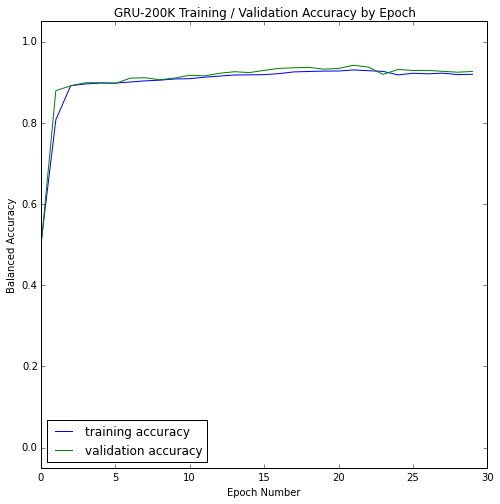

In [9]:
tr_acc = fit_results['acc']
val_acc = fit_results['val_acc']
epoch_nums = fit_results['epoch']

plt.figure(figsize=(8, 8), dpi=500)
plt.plot(epoch_nums, tr_acc, label='training accuracy')
plt.plot(epoch_nums, val_acc, label='validation accuracy')
plt.ylim([-0.05, 1.05])
plt.xlabel('Epoch Number')
plt.ylabel('Balanced Accuracy')
plt.title(MODEL_NAME + ' Training / Validation Accuracy by Epoch')
plt.legend(loc="lower left")
plt.savefig(fig_base_path + '_train_val_acc.png')
plt.show()

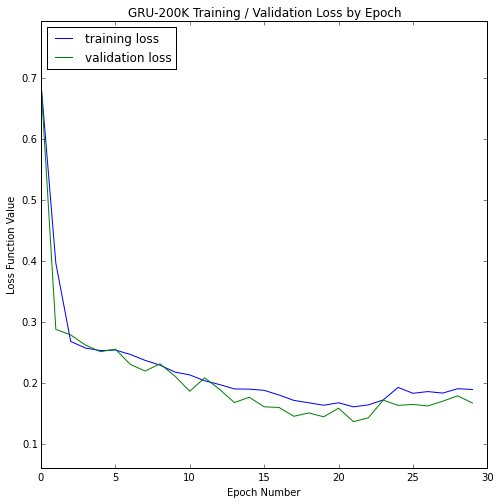

In [10]:
tr_loss = fit_results['loss']
val_loss = fit_results['val_loss']
epoch_nums = fit_results['epoch']

y_ax_min = np.min(np.min(tr_loss), np.min(val_loss)) - .1
y_ax_max = np.max(np.max(tr_loss), np.max(val_loss)) + .1
plt.figure(figsize=(8, 8),dpi=500)
plt.plot(epoch_nums, tr_loss, label='training loss')
plt.plot(epoch_nums, val_loss, label='validation loss')
plt.ylim([y_ax_min, y_ax_max])
plt.xlabel('Epoch Number')
plt.ylabel('Loss Function Value')
plt.title(MODEL_NAME + ' Training / Validation Loss by Epoch')
plt.legend(loc="upper left")
plt.savefig(fig_base_path + '_train_val_loss.png')
plt.show()

hello1
hello2
